# Big Data Mart Sales Problem

In [7]:
import numpy as np # linear algebra
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest
print("Setup Complete")

Setup Complete


# Importing Data

In [8]:
from sklearn import linear_model

In [9]:
filepath="bigdatamart_Train.csv"

In [10]:
data=pd.read_csv(filepath)

# Information About Data

In [11]:
data.shape

(8523, 12)

Data 12 columns and 8523 rows . The main goal is to make analysis of data and to build Machine learning model to predict the sales of each of each item at a particular outlet



In [12]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Eploartory Data

In [13]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [14]:
data.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [15]:
len(data.Item_Identifier.unique())

1559

Trying to analyze the data and to see the features which affects more the Item_Outlet_Sales and the relationships beetween different features .And try to see what element can increase or decrease the items sales of outlet 

- Item_Type: The type of items allow to see her usefulness ,this feature could help to estimate how the item is loved by costomers.
    
- Item_MRP: the price of product can influence her sale . we will check the correlation between Item_MRP and Item_Outlet_Sales

- Outlet_Location_Type: The place where the supermarket is estabilished can influence her price(the price of a same item can be different for another store) and her sales if the store is in a big city or if it is easily accesible .

- Item_Visibility: if the product is clearly visible in the supermarket, it will be easily accessible to customers and its can be influence her sales.


# Explore Data analysis

In [16]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


'Item_Outlet_Sales' is the target that have to predict with future model

In [18]:
target='Item_Outlet_Sales'
features=[col for col in data.columns if col!=target]
print(len(features), features)

11 ['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


Making two list,one for categorical features and the second for numerical features .

In [19]:
cate_features=list(data[features].select_dtypes(include='object').columns)
num_features=list(set(features)-set(cate_features))
print('categorical features',len(cate_features),cate_features)
print('num features',len(num_features),num_features)

categorical features 7 ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
num features 4 ['Item_MRP', 'Item_Weight', 'Outlet_Establishment_Year', 'Item_Visibility']


get the name of columns which contains null values

In [22]:
#the function which get the columns which contains the null values
def get_null_cols(X,cols):
    null_cols=list(X[cols].isnull().sum()[X[cols].isnull().sum()>0].index)
    print("columns which contains null",null_cols)
    for col in null_cols :
        percent=(X[col].isnull().sum()/len(X[cols]))*100
        print("It has ",round(percent,2)," % to nulls values for ",col,"column")
cols = features + [target]
get_null_cols(data,cols)

columns which contains null ['Item_Weight', 'Outlet_Size']
It has  17.17  % to nulls values for  Item_Weight column
It has  28.28  % to nulls values for  Outlet_Size column


Observations :  7 categorigals features, 4 numericals features ; 2 features 'Item_Weight'and 'Outlet_Size' which contains Null values .


# Numerical features exploratory

<ipython-input-23-f2759dc96b11>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),


<AxesSubplot:>

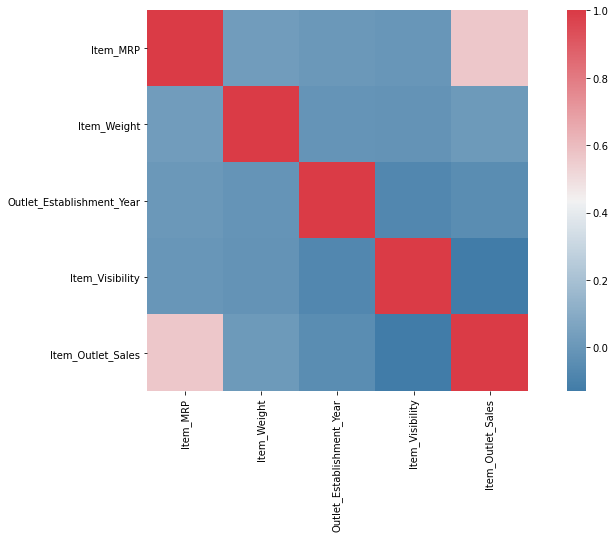

In [23]:
plt.figure(figsize=(14,7))
corr = data[num_features+[target]].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True)

Relashionship between the price(Item_MRP) and sales(Item_Outlet_Sales)

Text(0, 0.5, 'Item_Ou<tlet_Sales')

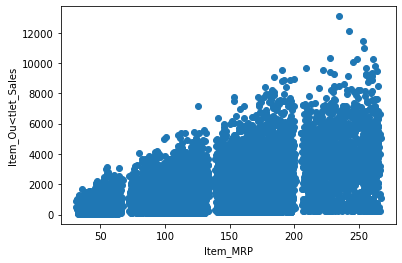

In [24]:
plt.figure()
plt.scatter(x=data['Item_MRP'], y=data[target])
plt.xlabel("Item_MRP")
plt.ylabel("Item_Ou<tlet_Sales")

Text(0, 0.5, 'Item_Outlet_Sales')

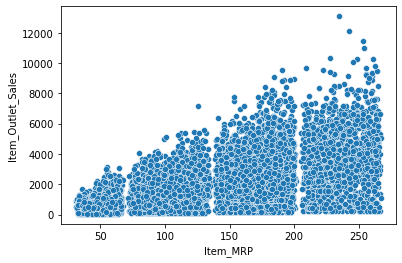

In [25]:
sns.scatterplot(x=data['Item_MRP'], y=data[target])
plt.xlabel("Item_MRP")
plt.ylabel("Item_Outlet_Sales")

the scatterplot above suggests that the price'Item_MRP' and the 'Item_Outlet_Sales' are strong correlated .

The correlation between "Item_Visibility" and "Item_Outlet_Sales" is less high then got previously, More item is visible more it will be sold .But the graph show the contrary , Because it has 0.0% visibility for some items . Probably it is the missing data and they set 0.0% by defaul



<Figure size 432x288 with 0 Axes>

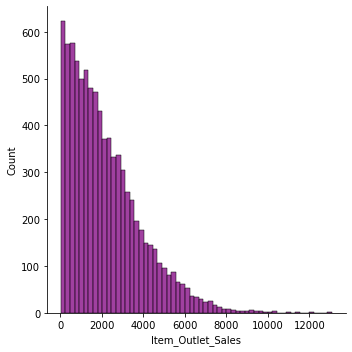

the skew (is positive): 1.1775306028542796


In [26]:
plt.figure()
sns.displot(data[target],color="purple")
plt.show()
print("the skew (is positive):",data[target].skew())

Target is skewed , we can make a transformation(log,...) to reduce the skewness .



# Categorical features exploratory

The values of the categorical features .

In [27]:
for col in cate_features:
    uniq_values=data[col].unique();
    print("unique values for columns ",col, " is : ",len(uniq_values),uniq_values)

unique values for columns  Item_Identifier  is :  1559 ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
unique values for columns  Item_Fat_Content  is :  5 ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
unique values for columns  Item_Type  is :  16 ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
unique values for columns  Outlet_Identifier  is :  10 ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
unique values for columns  Outlet_Size  is :  4 ['Medium' nan 'High' 'Small']
unique values for columns  Outlet_Location_Type  is :  3 ['Tier 1' 'Tier 3' 'Tier 2']
unique values for columns  Outlet_Type  is :  4 ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


Among the categorical characteristics, it is noticable that there are ordinal characteristics. An ordinal characteristic is first of all a categorical characteristic which contains values which can be ordered. In dataset it contains:

- 'Item_Fat_Content'
- 'Outlet_Size'
- 'Outlet_Type'
- 'Outlet_Location_Type'

Following anlysis is based on median value. When having a skewed distribution, the median is a better measure of central tendency than the

<Figure size 432x288 with 0 Axes>

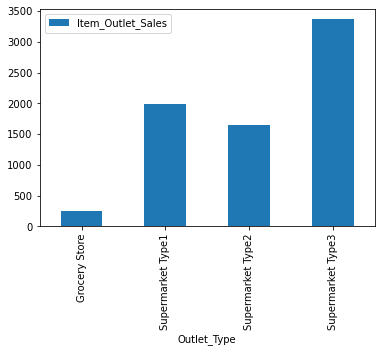

In [28]:
plt.figure()
data[['Outlet_Type', target]].groupby('Outlet_Type').median().plot(kind='bar')
plt.show()

<Figure size 432x288 with 0 Axes>

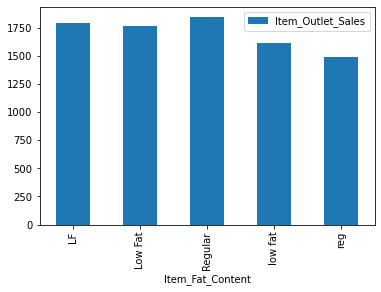

In [29]:
plt.figure()
data[['Item_Fat_Content',target]].groupby('Item_Fat_Content').median().plot(kind='bar')
plt.show()

<Figure size 432x288 with 0 Axes>

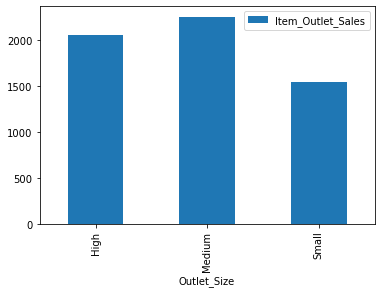

In [30]:
plt.figure()
data[['Outlet_Size',target]].groupby('Outlet_Size').median().plot(kind='bar')
plt.show()

<Figure size 432x288 with 0 Axes>

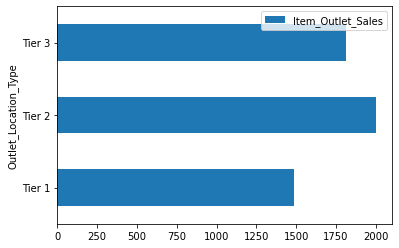

In [31]:
plt.figure()
#data[['Outlet_Location_Type',target]].groupby('Outlet_Location_Type').median().plot(kind='bar')
data[['Outlet_Location_Type',target]].groupby('Outlet_Location_Type').median().plot.barh()
plt.show()

<AxesSubplot:ylabel='Item_Type'>

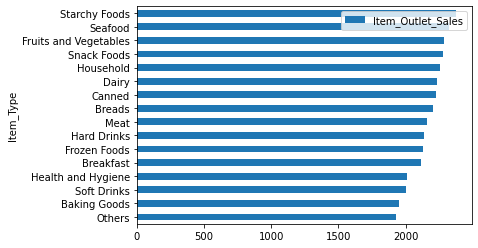

In [32]:
data.pivot_table(values='Item_Outlet_Sales', index='Item_Type').sort_values(by='Item_Outlet_Sales').plot(kind="barh")

In [33]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [34]:
for type in data['Outlet_Type'].unique():
    print("\n",type)
    print(data[data['Outlet_Type']==type]['Outlet_Size'].value_counts(dropna=False))


 Supermarket Type1
Small     1860
NaN       1855
High       932
Medium     930
Name: Outlet_Size, dtype: int64

 Supermarket Type2
Medium    928
Name: Outlet_Size, dtype: int64

 Grocery Store
NaN      555
Small    528
Name: Outlet_Size, dtype: int64

 Supermarket Type3
Medium    935
Name: Outlet_Size, dtype: int64


supermarket Type1 is alone which have 'High' as Outlet Size. Supermarket Type2 and Type3 have only a Medium size for its outlets. This analysis will be helpful in preprocessing step to do imputation in order to give value which will have sense for Outlet_Size column



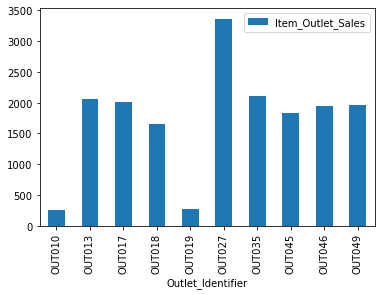

In [35]:
data[['Outlet_Identifier', target]].groupby('Outlet_Identifier').median().plot(kind='bar')
plt.show()

# Data Preprocessing

In [36]:
items_weight_mean = data[['Item_Identifier', 'Item_Weight']].groupby('Item_Identifier').mean()
print(items_weight_mean[items_weight_mean['Item_Weight'].isnull()])
items_weight_mean[items_weight_mean['Item_Weight'].isnull()] = data['Item_Weight'].mean()
print(items_weight_mean[items_weight_mean['Item_Weight'].isnull()])

                 Item_Weight
Item_Identifier             
FDE52                    NaN
FDK57                    NaN
FDN52                    NaN
FDQ60                    NaN
Empty DataFrame
Columns: [Item_Weight]
Index: []


In [37]:
def add_item_weight(row):
    item_id = row['Item_Identifier']
    item_weight = row['Item_Weight']
    
    if not pd.isnull(item_weight):
        return item_weight
    # else
    return items_weight_mean['Item_Weight'][items_weight_mean.index==item_id]
    
# impute item_weight
data['Item_Weight'] = data.apply(add_item_weight, axis=1).astype(float)
get_null_cols(data, features)

columns which contains null ['Outlet_Size']
It has  28.28  % to nulls values for  Outlet_Size column


Imputing Outlet_Size by taking most frequent Size based on Outlet type.Above we found the relation between Outlet_Size and Outlet_Type.

In [38]:
most_outlet_size_by_type = data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
most_outlet_size_by_type

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [39]:
def add_outlet_size(row):
    outlet_type = row['Outlet_Type']
    outlet_size = row['Outlet_Size']
    
    if not pd.isnull(outlet_size):
        return outlet_size
    return most_outlet_size_by_type.loc['Outlet_Size'][most_outlet_size_by_type.columns==outlet_type][0]

# impute outlet_size

data['Outlet_Size'] = data.apply(add_outlet_size, axis=1)
get_null_cols(data, features)

columns which contains null []


In [40]:
data.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

Managing categorical features with labelencoder

In [41]:
for col in cate_features:
    encoder=LabelEncoder()
    data[col]=encoder.fit_transform(data[col])

In [42]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


# Model Training and parameters tuning

In [43]:
X_train, X_valid, y_train, y_valid = train_test_split(data[features], data[target], test_size=0.3, random_state=1)

In [44]:
model = RandomForestRegressor(n_estimators=1000, random_state=0)
model.fit(X_train, y_train)
preds = model.predict(X_valid)
score = r2_score(y_valid, preds)
print('R2:', score)

R2: 0.5656421051032332


In [46]:
model = RandomForestRegressor(random_state=0)

my_pipeline = Pipeline(steps=[
                              ('rfr', model)
                             ])

param_grid = [
{'rfr__n_estimators': [100, 1000], 'rfr__max_features': ["auto", "log2"], 
 'rfr__max_depth': [None, 25]}
]

grid_search_rfr = GridSearchCV(my_pipeline, param_grid, cv=4, scoring='r2', n_jobs=-1)
grid_search_rfr.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('rfr',
                                        RandomForestRegressor(random_state=0))]),
             n_jobs=-1,
             param_grid=[{'rfr__max_depth': [None, 25],
                          'rfr__max_features': ['auto', 'log2'],
                          'rfr__n_estimators': [100, 1000]}],
             scoring='r2')

In [47]:
print("Best parameter (CV score=%0.3f):" % grid_search_rfr.best_score_)
print(grid_search_rfr.best_params_)

Best parameter (CV score=0.580):
{'rfr__max_depth': None, 'rfr__max_features': 'log2', 'rfr__n_estimators': 1000}


In [48]:
model = RandomForestRegressor(n_estimators=1000, random_state=0, max_depth=None, max_features='log2')
model.fit(X_train, y_train)
preds = model.predict(X_valid)
score = r2_score(y_valid, preds)
print('R2:', score)

R2: 0.5893701781263554
